In [1]:
from utils import *

In [2]:
df=pd.read_csv("E:\Backup\Data\Processed&FeatureEngineered.csv")

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1736\454961572.py:1: SyntaxWarning: invalid escape sequence '\B'
  df=pd.read_csv("E:\Backup\Data\Processed&FeatureEngineered.csv")


# EDA


**Corelation between the features**

Index(['Unnamed: 0', 'MONTH', 'NETSALESRATE', 'PROFITPER', 'SALESQTY',
       'SALESAMOUNT', 'UNIT_SALE_VALUE', 'PROFIT', 'ITEM_FREQ', 'LOG_PROFIT'],
      dtype='object')


Text(0.5, 1.0, 'Corelation between the features')

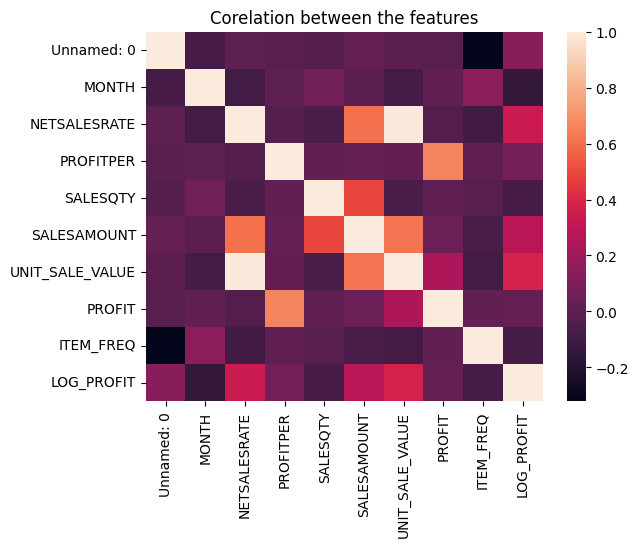

In [3]:
num_cols=df.dtypes[(df.dtypes=='int64') |(df.dtypes=='float64')]
print(num_cols.keys())
sns.heatmap(df[num_cols.keys()].corr())
plt.title('Corelation between the features')
#There isn't much corelation between the numerical features.


**Profit obtained with respect to Months and City**


Text(0.5, 1.0, 'Profit per City')

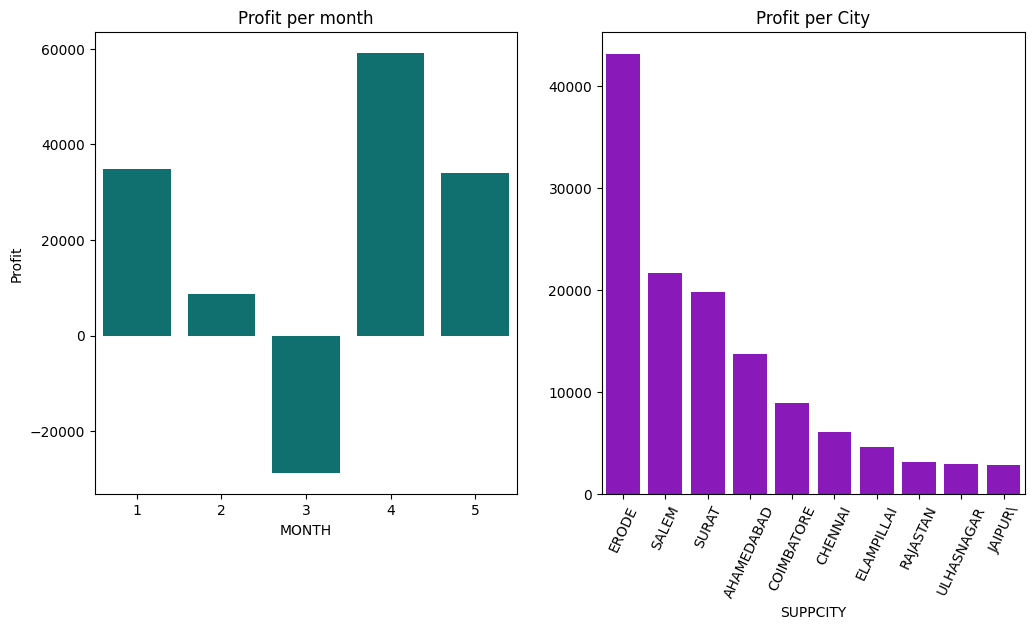

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(12,6))

month_net_profit=df.groupby('MONTH')['PROFITPER'].sum().reset_index()
sns.barplot(month_net_profit,x='MONTH', y='PROFITPER',ax=axes[0],color='teal')
axes[0].set_ylabel('Profit')
axes[0].set_title('Profit per month')

city_net_profit=df.groupby('SUPPCITY')['PROFITPER'].sum().reset_index().sort_values(by='PROFITPER',ascending=False)
sns.barplot(city_net_profit[:10],x='SUPPCITY', y='PROFITPER',ax=axes[1],color='darkviolet')
plt.xticks(rotation=65)
axes[1].set_ylabel(None)
axes[1].set_title('Profit per City')



The highest profit is observed in April (Month 4).
This suggests a seasonal spike or promotional success that could be leveraged further.

Erode leads significantly in profit contribution, followed by Salem and Surat.
These cities appear to be strong markets worth targeting with increased investment or marketing.

**BUSINESS RECOMMENDATIONS**

April Focus: Allocate more manpower and marketing budget during April to capitalize on the peak in profitability.

City-Level Strategy: Consider expanding operations, offers, or logistics in high-performing cities like Erode to further boost sales and customer engagement.

**PROFIT WRT VOLUME**

Text(0.5, 1.0, 'Volume vs Profit')

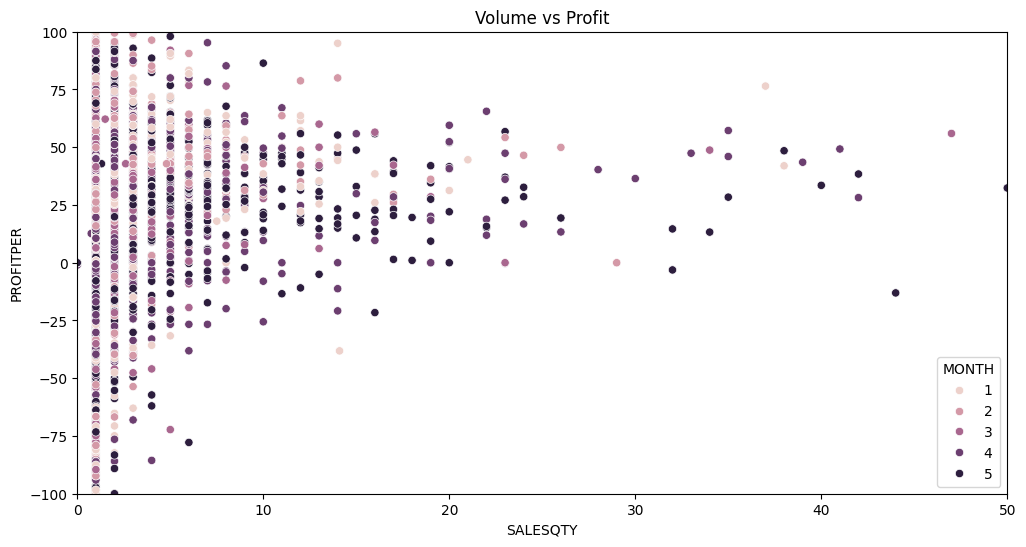

In [6]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(data=df, x='SALESQTY', y='PROFITPER',hue='MONTH')
ax.set_xlim(0,50,auto=False)
ax.set_ylim(-100,100)
plt.title('Volume vs Profit')


**MOST PROFITABLE PRODUCTS**

          ITEMNAME         PROFIT
3    A5 PATTUSAREE   14888.515857
1         A3 PATTU    5331.689430
2         A4 PATTU    4932.653760
81        PURE MIX    2288.463251
91     S1 SOFTSILK     929.388129
..             ...            ...
4   APOORVA SAREES    -162.365363
35   HIGH MANIPURI    -190.758348
5      ART PAVADAI    -214.285500
70        NIGHTIES   -1332.567203
92     S2 SOFTSILK -383677.729818

[115 rows x 2 columns]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A5 PATTUSAREE'),
  Text(1, 0, 'A3 PATTU'),
  Text(2, 0, 'A4 PATTU'),
  Text(3, 0, 'PURE MIX'),
  Text(4, 0, 'S1 SOFTSILK'),
  Text(5, 0, 'SOFT SILK'),
  Text(6, 0, 'PATTU VESTI'),
  Text(7, 0, 'LEHANGA'),
  Text(8, 0, 'SENTHERI'),
  Text(9, 0, 'A2 PATTU SAREE')])

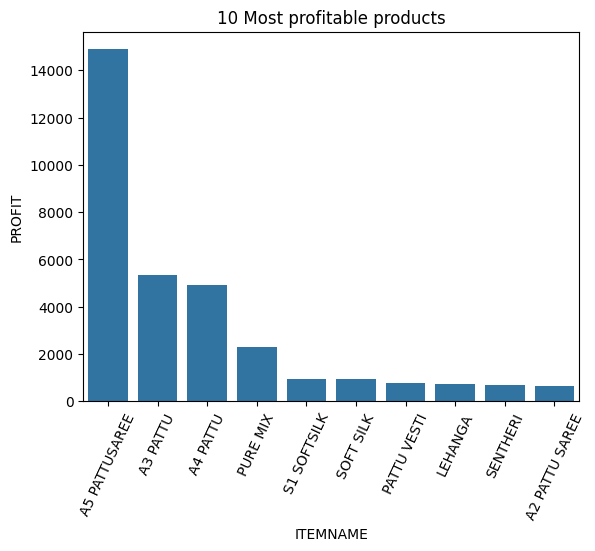

In [ ]:

profits=df.groupby('ITEMNAME')['PROFIT'].mean().reset_index().sort_values(by='PROFIT',ascending=False)
print(profits)
sns.barplot(profits[:10],x='ITEMNAME',y='PROFIT')
plt.title('10 Most profitable products')
plt.xticks(rotation=65)

The product A5 pattu saree is the most profitable, significantly more than its counterparts.

**BUSINESS RECOMMENDATIONS**

We must therefore focus on procuring more of those in better quality and versatile designs to attract more customers.
It has to be stocked regularly and must be prioritized during procurement.
Feature A5 patu saree in ad campaigns and other promotions

**TOP SUPPLYING CITIES**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ERODE'),
  Text(1, 0, 'SURAT'),
  Text(2, 0, 'BANGALORE'),
  Text(3, 0, 'AHAMEDABAD'),
  Text(4, 0, 'SALEM'),
  Text(5, 0, 'MUMBAI'),
  Text(6, 0, 'COIMBATORE'),
  Text(7, 0, 'ULHASNAGAR'),
  Text(8, 0, 'CHENNAI'),
  Text(9, 0, 'JAIPUR\\')])

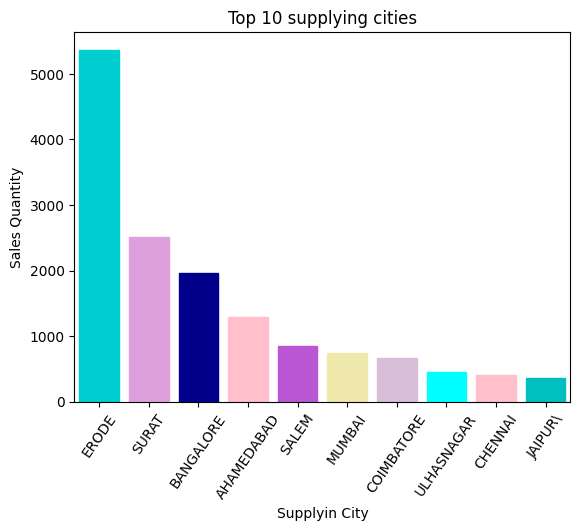

In [8]:
city_qty = df.groupby(['SUPPCITY'])['SALESQTY'].sum().sort_values(ascending=False).head(10).reset_index()
ax=sns.barplot(data=city_qty, x='SUPPCITY', y='SALESQTY')
colors = ['darkturquoise','plum','darkblue','pink','mediumorchid','palegoldenrod','thistle','aqua','pink','c']
for i, patch in enumerate(ax.patches):
    patch.set_color(colors[i])
plt.xticks(rotation=60)
plt.title('Top 10 supplying cities')
plt.xlabel('Supplyin City')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=55)



**TOP PROFITABLE PATTERNS**

PATTERN
SILVER BROCADE    661004.964908
PAYADI            181853.823240
JHAMDHANI          48863.775601
DIGITALPRINT       43681.189670
MULTY WEAVING      26295.370199
SEQUENCY           23931.331264
TISSUE             23924.000376
FOIL PRINT         23584.098428
TISSU BROCADE      23063.224500
SOFT               22644.230627
Name: PROFIT, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_1736\1192976794.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SILVER BROCADE'),
  Text(1, 0, 'PAYADI'),
  Text(2, 0, 'JHAMDHANI'),
  Text(3, 0, 'DIGITALPRINT'),
  Text(4, 0, 'MULTY WEAVING'),
  Text(5, 0, 'SEQUENCY'),
  Text(6, 0, 'TISSUE'),
  Text(7, 0, 'FOIL PRINT'),
  Text(8, 0, 'TISSU BROCADE'),
  Text(9, 0, 'SOFT')])

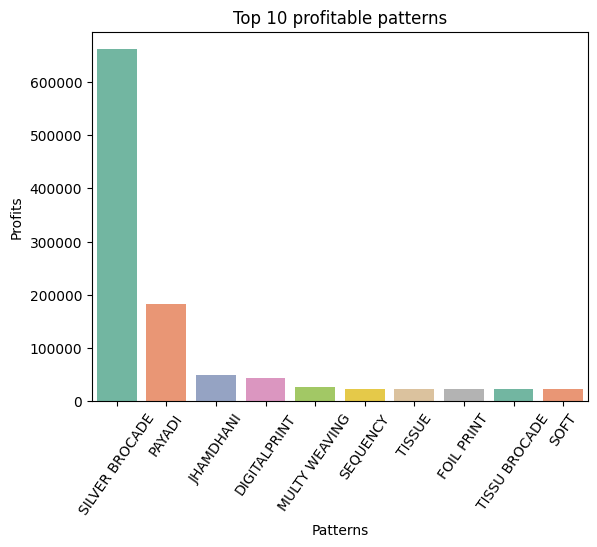

In [9]:
#Top 10 profitable patterns
profit_pattern=df.groupby('PATTERN')['PROFIT'].sum().sort_values(ascending=False).head(10)
print(profit_pattern)
sns.barplot(profit_pattern,palette="Set2")
plt.title('Top 10 profitable patterns')
plt.xlabel('Patterns')
plt.ylabel('Profits')
plt.xticks(rotation=55)

In addition to focusing on profitable products, we should prioritize profitable patterns and high-performing supply cities. Increasing procurement visits to the top 10 cities can help secure more profitable products. Likewise, we should actively source and stock top-performing patterns to boost overall profitability.

Text(0.5, 1.0, 'Full Range Distribution of PROFIT')

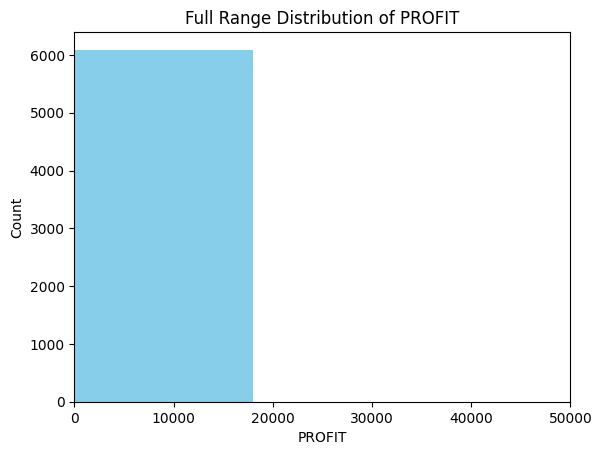

In [10]:
plt.hist(df['PROFIT'], bins=50, color='skyblue')
plt.xlim(0, 50000) 
plt.xlabel('PROFIT')
plt.ylabel('Count')
plt.title('Full Range Distribution of PROFIT')



From the graph we observe the data is right-skewed;majority of data is tightly concentrated between 0 and ~15,000.
So in order to stabilise the variance we use logarathmic transformation.
This helps to make the profit distribution more normal-like that helps a lot of ML models.

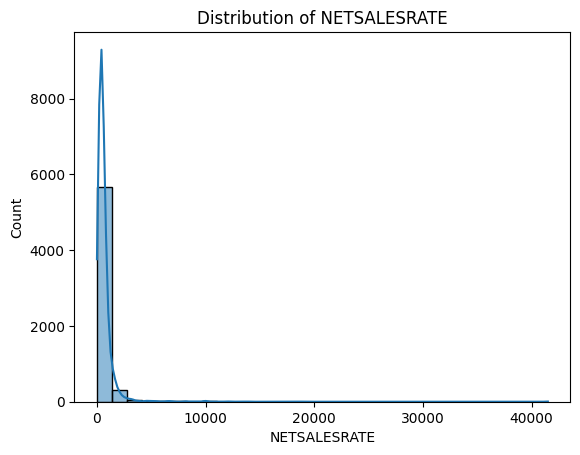

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['NETSALESRATE'], kde=True, bins=30)
plt.title("Distribution of NETSALESRATE")
plt.show()


Since positive skewed log transformation might help.

**SUNBURST CHART**

In [ ]:
import plotly.io as pio
pio.renderers.default = 'browser'

fig=px.sunburst(df,path=['MONTH','SUPPCITY','PATTERN','ITEMNAME'])
fig.show()


**GANTT CHART**

In [12]:
import plotly.express as px
import pandas as pd

# Assume you create dummy durations since you have only MONTH, not a full date range
df['START'] = pd.to_datetime(df['MONTH'].astype(str) + '-2023')  # or use df['YEAR']
df['END'] = df['START'] + pd.offsets.MonthEnd(1)  # assuming each sale lasted one month

fig = px.timeline(
    df, 
    x_start="START", 
    x_end="END", 
    y="ITEMNAME", 
    color="SUPPCITY",  # or "PATTERN" / "COLOR"
    title="Gantt Chart: Item Sales Over Months by City"
)

fig.update_yaxes(autorange="reversed")
fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1736\2628609397.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



**TIMELINE CHART**

In [14]:
import plotly.express as px
import pandas as pd

df['START'] = pd.to_datetime(df['MONTH'].astype(str) + '-2025')  # or use actual year
df['END'] = df['START'] + pd.offsets.MonthEnd(1)

# Optional: bin profit levels into categories for better coloring
df['PROFIT_LEVEL'] = pd.qcut(df['PROFIT'], q=4, labels=["Low", "Mid", "High", "Very High"])

fig = px.timeline(
    df,
    x_start="START",
    x_end="END",
    y="SUPPCITY",  # or "PATTERN", "COLOR", etc.
    color="PROFIT_LEVEL",  # Use continuous color if you want raw profit
    hover_data=["ITEMNAME", "PROFIT", "SALESQTY"],
    title="Profit Timeline by Supplier City"
)

fig.update_yaxes(categoryorder='total ascending')
fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1736\3525325932.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



**1.Gantt Chart**: Item Sales Activity Over Months by City

This chart illustrates the temporal spread of various items sold across different cities. Each horizontal bar represents a city-item combination, and its length indicates the duration across which sales occurred. It helps identify:

    * Which cities consistently sell certain products over time

    * Temporal gaps or seasonality in sales

    * Long-running high-selling items (e.g., A2 PATTU SAREE, BRASSO)


**2.  Profit Timeline** (Sales Over Time)
This line plot visualizes how total profit changes over time — broken down monthly for different cities. It helps:

    * Track growth or dips in revenue over time

    * Identify high-performing months for seasonal planning

    * Understand the impact of external events (like holidays or campaigns)

Insight: Noticeable profit spikes during specific months (e.g., festival seasons) can be leveraged for promotions or stock ramp-ups.

**3. Sunburst Chart**: Category-wise Item Profit Breakdown

A multi-level sunburst plot is used to show:

Top level: Broad product categories (like Silk, Cotton)

Middle level: Sub-categories or item types

Innermost level: Individual products

It helps in:

    * Exploring hierarchical relationships in product lines

    * Identifying which categories or subcategories contribute the most profit

    * Spotting underperforming segments for improvement

In [15]:
%pip install adjustText


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


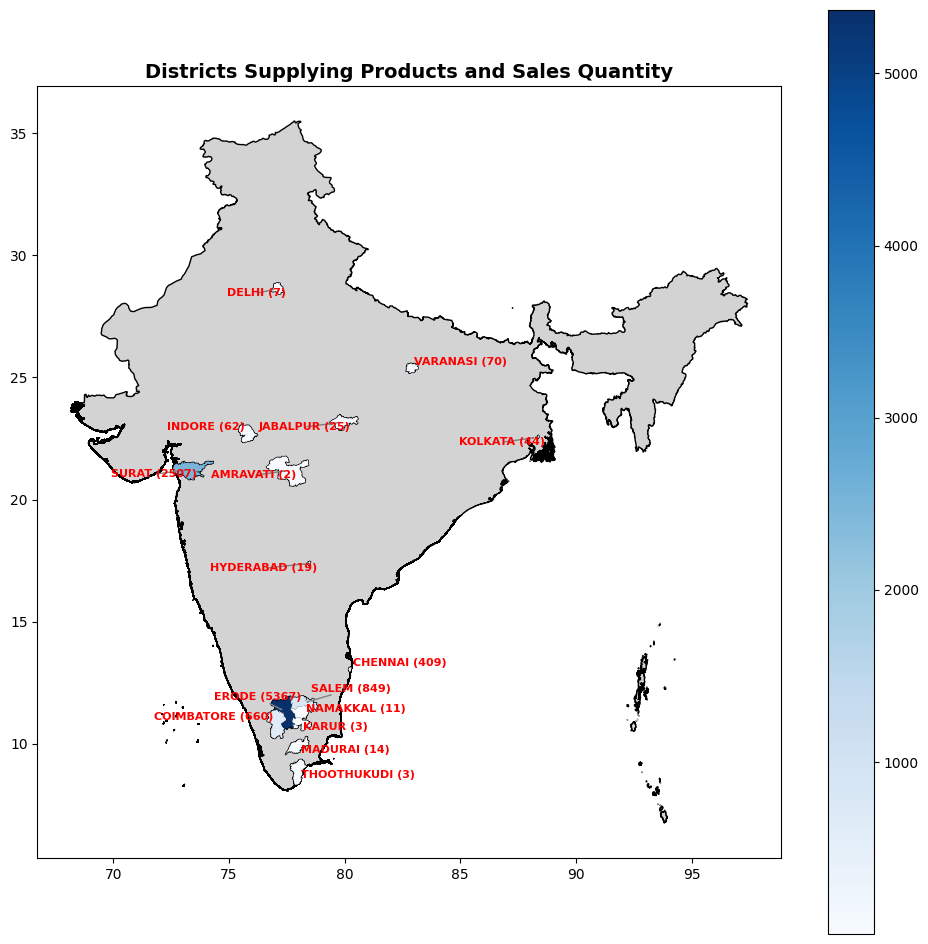

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Load shapefiles
districts_gdf = gpd.read_file(r"E:\Backup\College\III YEAR\SEM6\DV\India\IND_adm2.shp") 
country_gdf = gpd.read_file(r"E:\Backup\College\III YEAR\SEM6\DV\India\IND_adm0.shp") 

# Clean strings for matching
districts_gdf["NAME_2"] = districts_gdf["NAME_2"].str.strip().str.upper()
df['SUPPCITY'] = df['SUPPCITY'].str.strip().str.upper()

# Group sales data
supp_quantity = df.groupby('SUPPCITY')['SALESQTY'].sum().reset_index()

# Merge sales onto district geometry
merged_gdf = districts_gdf.merge(supp_quantity, left_on="NAME_2", right_on="SUPPCITY", how="inner")

# Plot
fig, ax = plt.subplots(figsize=(12, 12))
country_gdf.plot(ax=ax, color="lightgray", edgecolor="black")
merged_gdf.plot(ax=ax, color="skyblue", edgecolor="black")
merged_gdf.plot(column='SALESQTY', cmap='Blues', legend=True, ax=ax)

# Annotate with adjusted text
texts = []
for i, row in merged_gdf.iterrows():
    txt = ax.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        f"{row['SUPPCITY']} ({int(row['SALESQTY'])})",
        fontsize=8,
        weight='bold',
        ha='center',
        va='center',
        color='red'
    )
    texts.append(txt)

# Prevent overlaps
from adjustText import adjust_text
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='->', color='gray'))

plt.title("Districts Supplying Products and Sales Quantity", fontsize=14, weight='bold')
plt.show()


* This map provides a clear spatial distribution of supplier districts based on the total quantity of products supplied.
* Districts such as Erode, Coimbatore, Chennai, and Salem emerge as high-volume contributors, indicating regional hubs of production or distribution. 
* The use of spatial joins ensures geographic accuracy, while label adjustment improves readability in dense regions.